In [ ]:
!wget https://perso.esiee.fr/~gueurett/LV_Research/Acoustic_Analysis_Results.csv
!wget https://perso.esiee.fr/~gueurett/LV_Research/Auditory_Ratings.csv

---
---
# **Preprocessing**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn import preprocessing
from keras import layers, initializers
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

In [ ]:
data = pd.read_csv('Acoustic_Analysis_Results.csv', delimiter=',', dtype=None, encoding=None)
data = data.rename(columns={'Unnamed: 0': 'Filename'}) # rename the not-named column to the filename column

labels = pd.read_csv('Auditory_Ratings.csv', delimiter=',', dtype=None, encoding=None)['Outdoor vs. Indoor'][:200].to_numpy()

data = data.drop(columns=['Filename'])
data = data.fillna(data.mean())

for column_name in data.columns:
  data[column_name] = (data[column_name] - np.mean(data[column_name])) / np.std(data[column_name])

data = data.to_numpy()

nb_features = data.shape[1]
nb_samples  = data.shape[0]

rng     = np.random.default_rng() # shuffle time
shuffle = rng.choice(nb_samples, size=(nb_samples), replace=False)
data    = data[shuffle]
labels  = labels[shuffle]

print("-----------------------------")
print("|  data.shape:   ", data.shape, "|")
print("|  labels.shape: ", labels.shape, "   |")
print("-----------------------------")

-----------------------------
|  data.shape:    (200, 35) |
|  labels.shape:  (200,)    |
-----------------------------


In [ ]:
spliter = 0.2
index = int(nb_samples * (1-spliter))

train_x = data[:index]
test_x  = data[index:]

train_y = labels[:index]
test_y  = labels[index:]

print("----------------------------------")
print("| train_x.shape: ", train_x.shape)
print("| train_y.shape : ", train_y.shape)
print("----------------------------------")
print("| test_x.shape: ", test_x.shape)
print("| test_y.shape : ", test_y.shape)
print("----------------------------------")

----------------------------------
| train_x.shape:  (160, 35)
| train_y.shape :  (160,)
----------------------------------
| test_x.shape:  (40, 35)
| test_y.shape :  (40,)
----------------------------------


---
---
# **Linear Regression**

0.2640655761738956
[ 0.6237439   0.3660128  -0.11585399 -0.11910731 -0.01615018  6.73615015
 -6.83928346 -0.06104238 -1.01582673 -0.2383081   0.308553    0.74482782
 -0.24441888 -0.07192152  0.00767028  0.32572041 -0.60377427 -0.72061724
  0.38523182  0.0861131  -0.47429358 -0.55053339  0.94936573 -0.34206162
 -0.01016006  0.18415381 -0.04209357 -0.0359535  -0.00767955  0.26837689
  0.12771342 -0.20191972  0.20407205  0.16151987 -0.26771201]


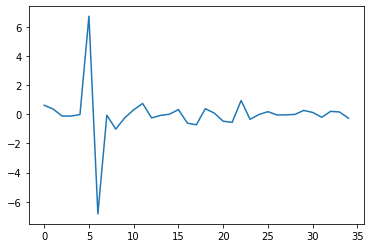

In [ ]:
linreg = LinearRegression()

linreg.fit(train_x, train_y)
print(linreg.score(test_x, test_y))

print(linreg.coef_)
plt.plot(linreg.coef_);

---
---
# **SVR**

0.04497535342059478
[[ 0.67679506  0.23873353  0.17431751 -0.24220206 -0.04939075  0.27863083
  -0.35563051  0.01320405 -1.24514118  0.07818849 -0.01877499  0.81764013
  -0.05941876  0.17356679 -0.13912648  0.17153472 -0.5574955  -0.61253912
   0.35689223  0.02502507 -0.3405456  -0.17956757  0.46288241 -0.37697614
  -0.01585168  0.24605562 -0.04021169  0.17236975  0.09557408  0.2030996
   0.455961   -0.01461446  0.22951678  0.24401057 -0.14794517]]


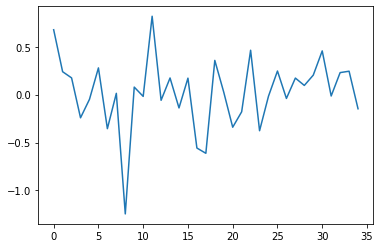

In [ ]:
svm = SVR(kernel='linear')
svm.fit(train_x, train_y)

print(svm.score(test_x, test_y))
print(svm.coef_)
plt.plot(svm.coef_[0])

---
---
# **AdaBoostRegressor**

0.17589305664780552
[0.04480593 0.02960116 0.00822818 0.03642953 0.01536883 0.01282275
 0.0194133  0.08085133 0.04922474 0.01888646 0.01108674 0.02667171
 0.0099309  0.02838611 0.01217618 0.05112629 0.00615145 0.03491355
 0.00667596 0.01733623 0.03424781 0.04124728 0.04928093 0.06748399
 0.00289885 0.00421942 0.0029465  0.07205788 0.03363867 0.04178541
 0.02177433 0.02509476 0.02575626 0.02620336 0.03127722]


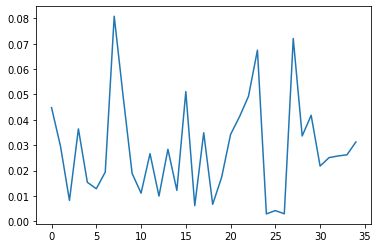

In [ ]:
ada = AdaBoostRegressor(n_estimators=100, random_state=8)
ada.fit(train_x, train_y)

print(ada.score(test_x, test_y))

print(ada.feature_importances_)
plt.plot(ada.feature_importances_)

---
---
# **RandomForestClassifier**

0.29893302273664546
[0.03994841 0.03218669 0.02266389 0.03137204 0.01746237 0.01987677
 0.02048253 0.02824725 0.04551451 0.0220844  0.02143535 0.0278424
 0.03187251 0.03033517 0.02515914 0.03490488 0.01971962 0.02722572
 0.02022549 0.01159243 0.03907551 0.05583767 0.06413682 0.02711855
 0.00304357 0.00430441 0.00774752 0.02999807 0.01914571 0.03372862
 0.04781886 0.01990032 0.03021455 0.04932479 0.03845346]


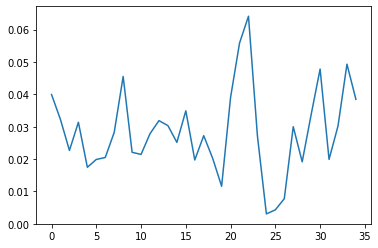

In [ ]:
rfc = RandomForestRegressor(n_estimators=1000, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', oob_score=True, random_state=8)
rfc.fit(data, labels)

print(rfc.oob_score_)
print(rfc.feature_importances_)
plt.plot(rfc.feature_importances_)

---
---
# **XGBoost**

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data, labels, test_size=0.3, random_state=8)

model = XGBRegressor(use_label_encoder=False, eval_metric='mlogloss')
model.fit(train_x, train_y)

[22:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='mlogloss', use_label_encoder=False)

In [ ]:
predictions = model.predict(test_x)

rmse = np.sqrt(MSE(test_y, predictions))
r2_score = r2(test_y, predictions)
print("RMSE : % f" %(rmse))
print("r2 : % f" %(r2_score))

RMSE :  1.258851
r2 :  0.296121


# **KNeighborsRegressor**

> Bloc en retrait



In [ ]:
max = 0
for k in range(1,140):

  kneigh = KNeighborsRegressor(n_neighbors=k, leaf_size=50)
  kneigh.fit(train_x, train_y)
  score = kneigh.score(test_x, test_y)
  if score > max:
    print("for k =", k, "score=",score)
    max = score

for k = 2 score= 0.03245127429056127
for k = 3 score= 0.1174541820892453
for k = 4 score= 0.12257214875077105
for k = 9 score= 0.15281642347544933
for k = 10 score= 0.17239433123843295
for k = 16 score= 0.17696630535561086
for k = 17 score= 0.20123128978384897
for k = 18 score= 0.20539456454063554
for k = 22 score= 0.21752174017989612
for k = 23 score= 0.21821022796845269
for k = 24 score= 0.21906834170329526
for k = 26 score= 0.2207885295255686
for k = 27 score= 0.2258166588601762


---
---

# **Decision Tree Regressor**

In [ ]:
tree = DecisionTreeRegressor(max_depth=1000, min_samples_split=5, min_samples_leaf=5, max_features='auto', random_state=8)
tree.fit(train_x, train_y)

print(tree.score(test_x, test_y))

-0.17698786660358556


---
---

# **Neural Network**

In [ ]:
def get_model():

  model = tf.keras.Sequential()

  model.add(layers.Dense(200))
  model.add(layers.ReLU())
  model.add(layers.Dropout(0.3))

  model.add(layers.Dense(1))

  optimizer = Adam(0.001)

  model.compile(optimizer=optimizer, loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

In [ ]:
model = get_model()

history = model.fit(train_x, train_y, validation_split=0.3, epochs=300, batch_size=2)

score = model.evaluate(test_x, test_y)
print("\n\nscore: ",score)

Epoch 1/300
56/56 [==============================] - 2s 12ms/step - loss: 7.4976 - mean_squared_error: 7.4976 - val_loss: 3.4776 - val_mean_squared_error: 3.4776
Epoch 2/300
56/56 [==============================] - 0s 7ms/step - loss: 2.6316 - mean_squared_error: 2.6316 - val_loss: 2.5017 - val_mean_squared_error: 2.5017
Epoch 3/300
56/56 [==============================] - 0s 7ms/step - loss: 1.7188 - mean_squared_error: 1.7188 - val_loss: 2.5597 - val_mean_squared_error: 2.5597
Epoch 4/300
56/56 [==============================] - 0s 6ms/step - loss: 1.6505 - mean_squared_error: 1.6505 - val_loss: 2.4109 - val_mean_squared_error: 2.4109
Epoch 5/300
56/56 [==============================] - 0s 6ms/step - loss: 1.5831 - mean_squared_error: 1.5831 - val_loss: 2.5824 - val_mean_squared_error: 2.5824
Epoch 6/300
56/56 [==============================] - 0s 8ms/step - loss: 1.3219 - mean_squared_error: 1.3219 - val_loss: 2.4340 - val_mean_squared_error: 2.4340
Epoch 7/300
56/56 [==============

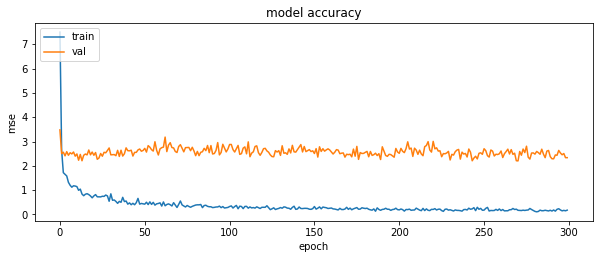

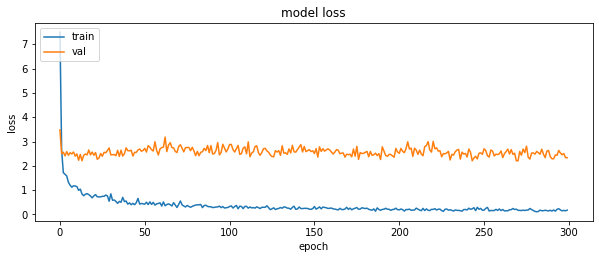

In [ ]:
fig = plt.figure(figsize=(10, 8))
plt.subplot(2,1,1)
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()